This notebook creates and then trains naive templates

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle, copy
from scipy.interpolate import interp1d

from modules import get_bandpass_dict, get_eff_wavelen, Sed, \
                    create_training_sets, train_templates

In [2]:
# plotting style
%config InlineBackend.figure_format = 'retina'
plt.style.use('paper.mplstyle')
twocol = 7.1014
onecol = 3.35

Load the filters

In [3]:
bandpass_dict = get_bandpass_dict()

Load the galaxy redshift catalog

In [4]:
with open('data/training_catalog.pkl', 'rb') as input:
    galaxies = pickle.load(input)

Create the naive templates

In [5]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 8
n = 3
modes  = np.concatenate((np.linspace(5500,4600,n,endpoint=False),np.linspace(4600,1000,N-n)))
sigmas = np.concatenate((np.linspace(0.35,0.56,n,endpoint=False),np.linspace(0.56, 0.9,N-n)))

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N8_"+str(i+1)] = template

Now train the templates

In [7]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.5, dmsfe_stop=0.03, verbose=True)

Round 1
N8_1:   64.7   39.7   33.8   31.5   30.5   29.9  
N8_2:   97.2   64.4   59.9   58.3  
N8_3:   85.8   64.9   61.9   60.4  
N8_4:   88.2   67.1   63.5   61.6   60.4  
N8_5:   98.6   64.6   61.9   60.5  
N8_6:  260.0  171.8  162.1  157.5  
N8_7:  527.1  324.6  304.8  296.9  
N8_8: 1519.1  912.2  891.8  
Round 2
N8_1:   31.8   28.6   28.1  
N8_2:   46.6   40.7   40.0  
N8_3:   45.5   40.8   40.4  
N8_4:   37.2   34.9   34.4  
N8_5:   30.9   28.8   28.5  
N8_6:   72.4   66.0   65.3  
N8_7:  300.4  
N8_8:  661.2  570.3  557.3  
Round 3
N8_1:   29.3   27.7   27.4  
N8_2:   43.6   39.8   39.4  
N8_3:   39.6  
N8_4:   35.4  
N8_5:   30.5   29.4   29.3  
N8_6:   56.3   53.6   53.0  
N8_7:  133.4  120.5  119.3  
N8_8:  851.4  819.3  813.6  
Round 4
N8_1:   28.6   27.6   27.4  
N8_2:   39.3  
N8_3:   38.3   35.3   35.1  
N8_4:   34.4  
N8_5:   24.5   23.8   23.6  
N8_6:   60.8   59.2  
N8_7:   87.2   84.1   83.6  
N8_8:  934.5  913.3  
Round 5
N8_1:   28.6   27.8  
N8_2:   38.5  
N8_3:   3

Number of fluxes in each training set:
[44676, 41394, 42124, 53652, 60240, 80771, 62896, 25975]


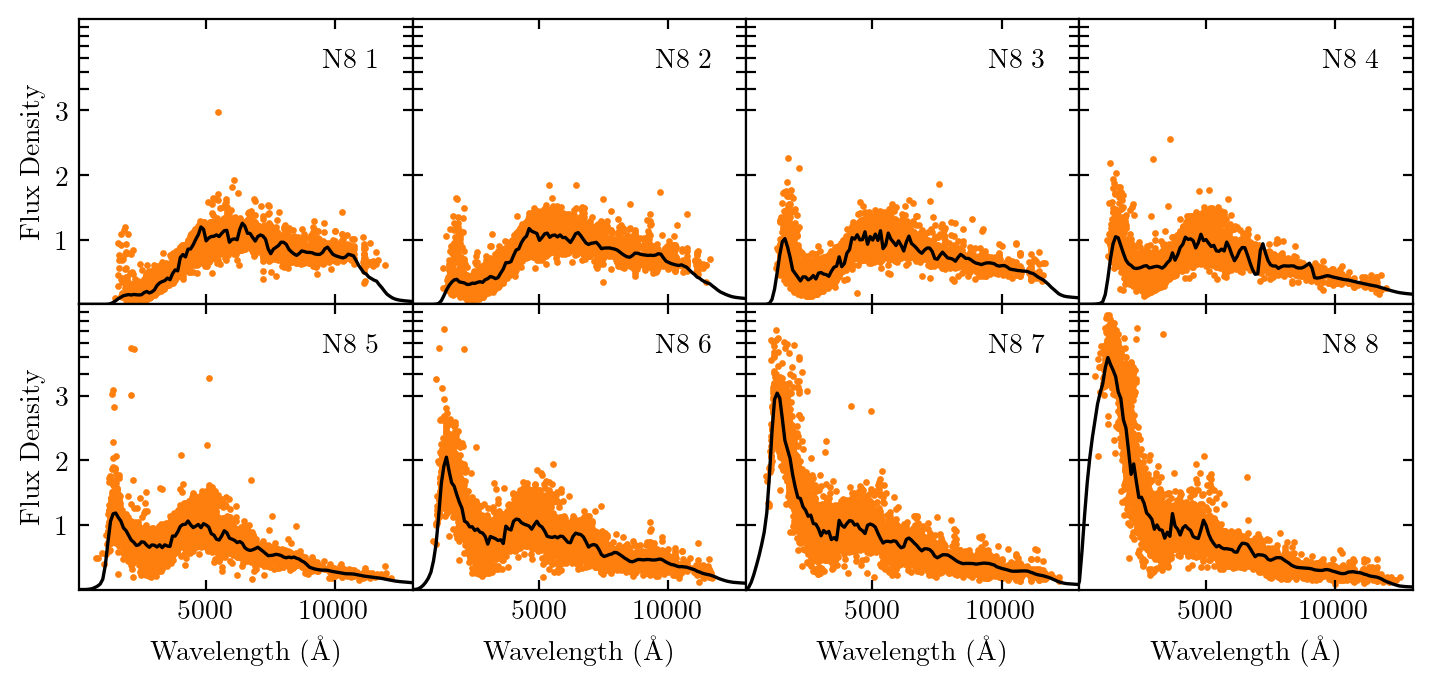

In [8]:
ncols = 4
nrows = int(N/ncols+0.5)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    wavelen = [row[0] for row in final_sets["N8_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N8_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N8_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N8 "+str(i+1),transform=ax.transAxes,ha="right",va="top")

for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','','',''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

#fig.savefig('plots/N8_trained.png')

Number of fluxes in each training set:
[41782, 43763, 50131, 60314, 67945, 66615, 55074, 26104]


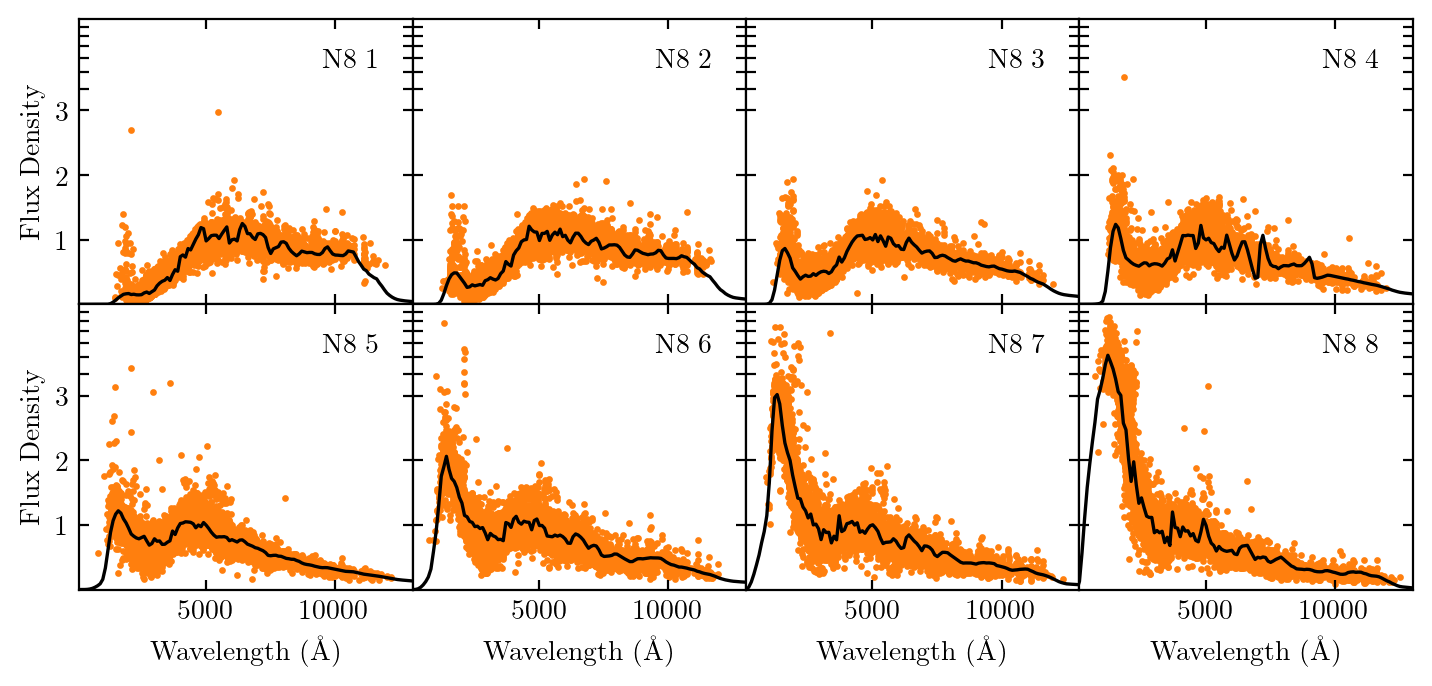

In [7]:
ncols = 4
nrows = int(N/ncols+0.5)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    wavelen = [row[0] for row in final_sets["N8_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N8_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N8_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N8 "+str(i+1),transform=ax.transAxes,ha="right",va="top")

for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','','',''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

#fig.savefig('plots/N8_trained.png')

(0, 25)

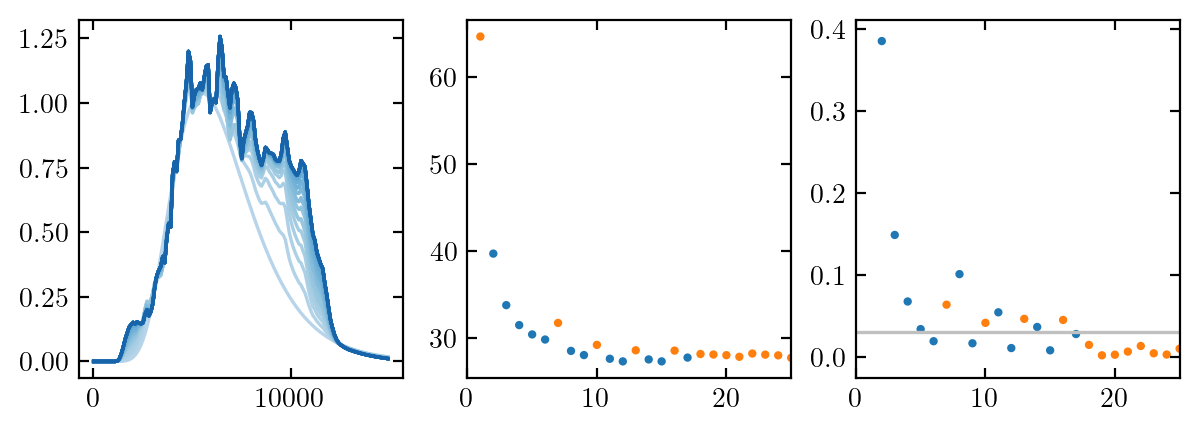

In [156]:
N = 1
name = "N8_"+str(N)

seds = []
mse = []
colors = []
for i in range(1,max(history[name].keys())+1):
    for j in range(0,max(history[name][i].keys())+1):
        seds.append(history[name][i][j]['sed'])
        mse.append(history[name][i][j]['msfe'])
        if j == 0:
            colors.append('C1')
        else:
            colors.append('C0')
x = np.arange(1,len(mse)+1)

x2 = np.arange(1,len(mse))
dmse = [np.fabs(mse[i+1]-mse[i])/mse[i] for i in range(len(x2))]

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(twocol,twocol/3))

color_idx = np.linspace(0.3,0.8,len(seds))
for i,sed in enumerate(seds):
    ax1.plot(sed.wavelen, sed.flambda, c=plt.cm.Blues(color_idx[i]))
    
ax2.scatter(x, mse, c=colors)
ax2.set_xlim(0,25)

ax3.scatter(x2+1, dmse, color=colors[1:])
ax3.hlines(0.03,0,len(x2)+2,color='silver')
ax3.set_xlim(0,25)#len(x2)+2)

#ax2.set_ylim(27,41)
#ax3.set_ylim(-0.01,0.17)